# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

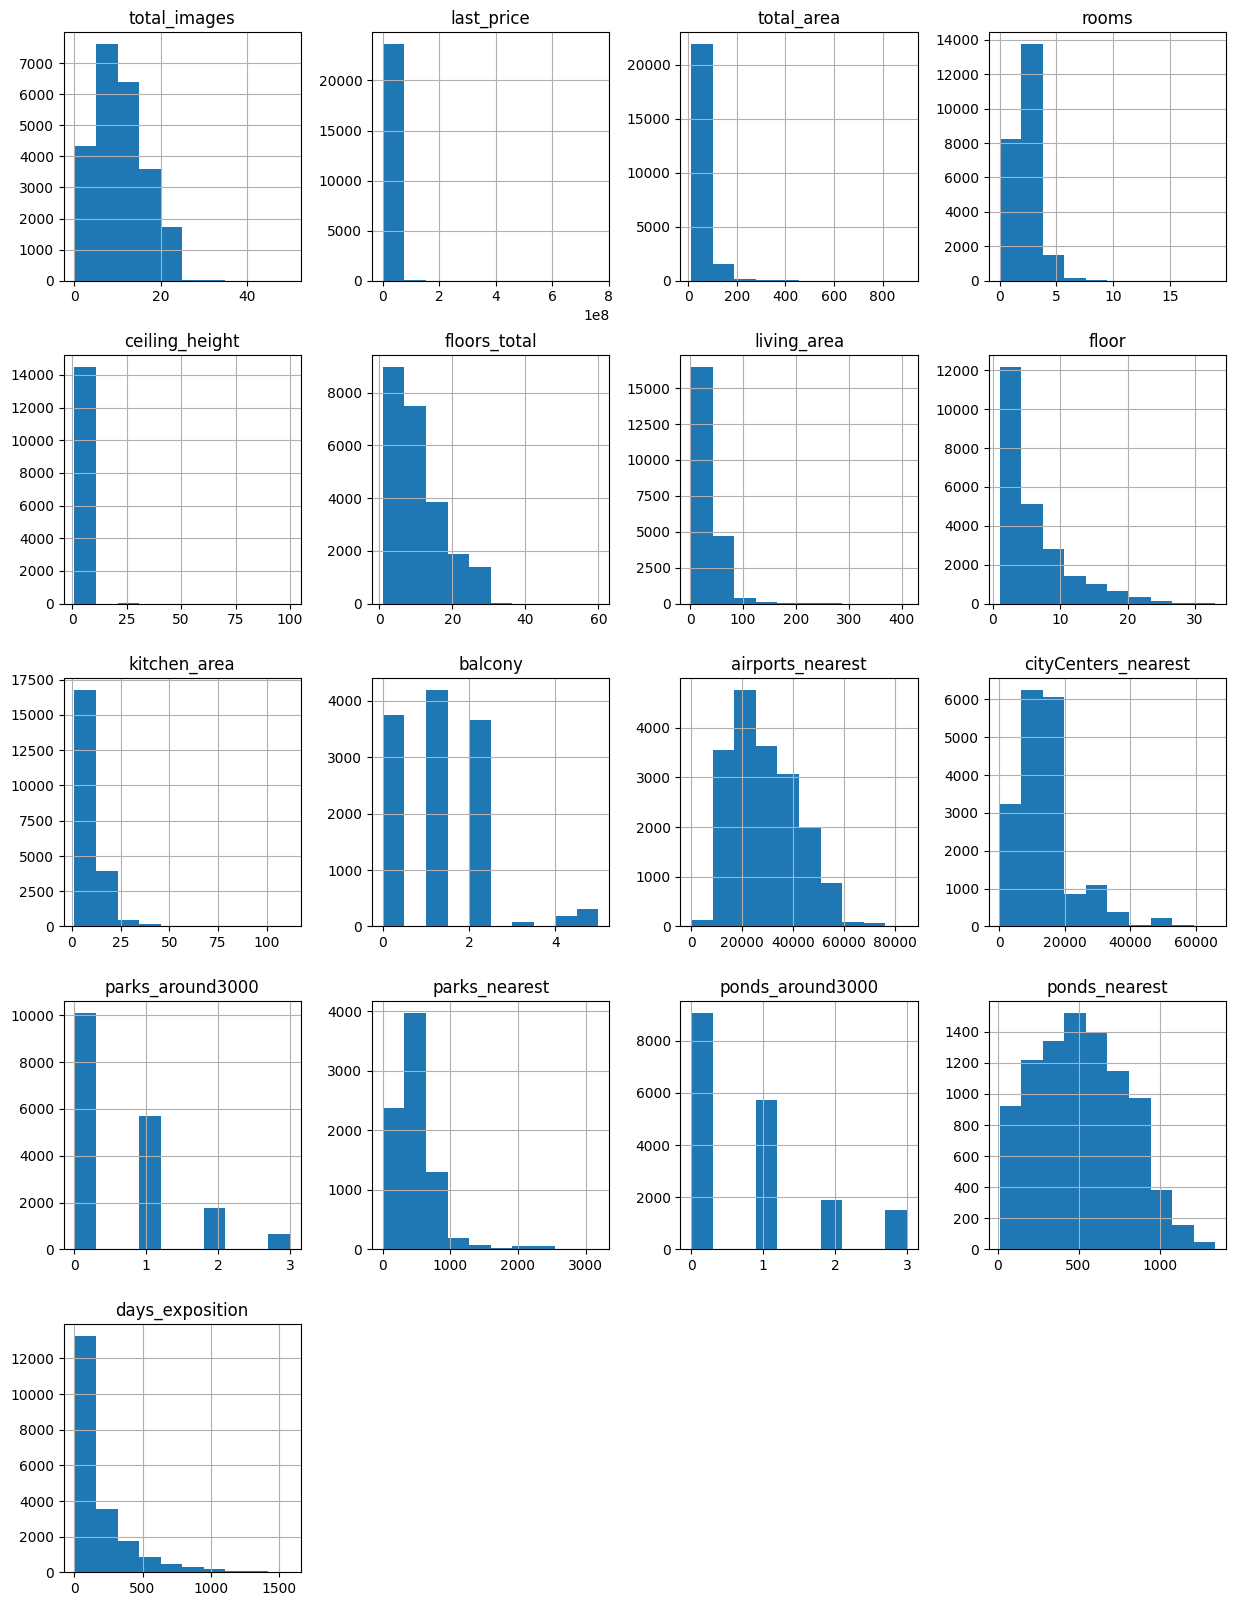

In [5]:
df.hist(figsize=(15, 20))

In [6]:
df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head()

locality_name
Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: last_price, dtype: int64

In [7]:
df['is_it_piter'] = df['locality_name'].map(lambda x: 1 if x == 'Санкт-Петербург' else 0)

In [8]:
df['is_it_piter'].mean()

0.6633613232625849

### Предобработка данных


#### Посмотрим какие поля сколько пропусков содержат:

<AxesSubplot: >

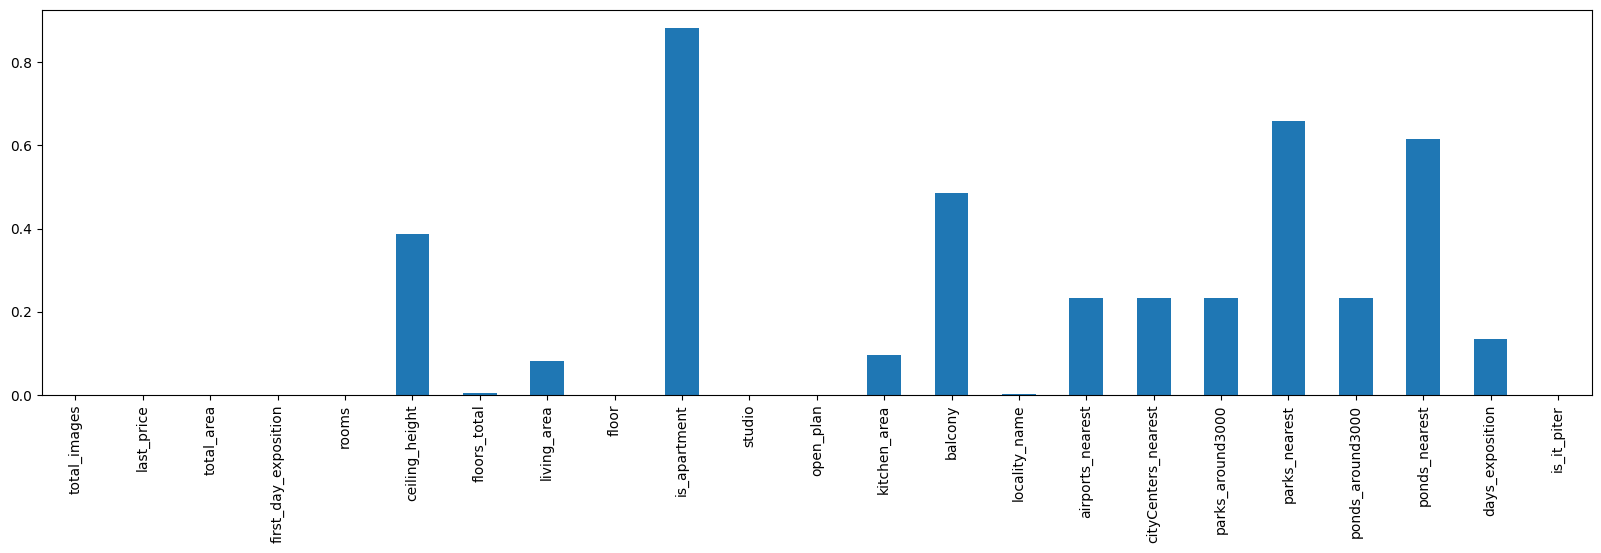

In [9]:
df.isna().mean().plot.bar(figsize=(20, 5))

Больше всего пропусков содержат следующие поля:<br>
<ul>
    <li></li>
    <li></li>
    <li></li>
</ul>
В случае с колличеством балконов, наличием в приделах 3000 м. парков и прудов, отсутствие данных можно приранятьотсутствию таких объектов, т.е. заменить пропущенные значения на ноль.


In [10]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

К пропускам данных могли привести следующие факторы:<bк>

#### Рассмотрим типы данных в столбцах

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Большенство числовых значений представленны в формате float64. Даже если признак может быть выражен целым числов из-за наличия пропусков столбец будет преобразован в формат вещесвтвенных чисел, т.к. значение NaN к этому формату данных.<br><br>
Поле 'first_day_exposition' – содержит даты, но в формате object. Переведем значаения этого столбца в формат datetime (Timestamp), для удобной манируляции данными при работе.

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dt%H:%M:%S')

In [13]:
type(df['first_day_exposition'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'is_it_piter'],
      dtype='object')

In [15]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
is_it_piter                 0
dtype: int64

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты:

In [16]:
len(df['locality_name'].unique())

365

In [17]:
# df['locality_name'].unique()

In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('село', '')
df['locality_name'] = df['locality_name'].str.replace('деревня', '')


In [19]:
len(df['locality_name'].unique())

323

#### Найдём и устраним редкие и выбивающиеся значения

Поле `total_images` может влиять на привлекательность объявление, но врядли повлияет на стоимость объекта.
Поэтому, начнем с поля `'last_price'`:

<AxesSubplot: >

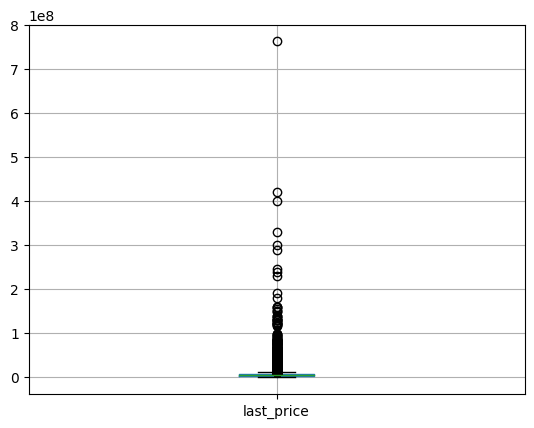

In [20]:
df.boxplot('last_price')

Какой-то объект явно вылетел в космос, посмотрим на него:

<AxesSubplot: >

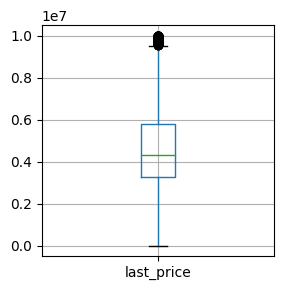

In [21]:
df.query('last_price < 10000000').boxplot('last_price', figsize=(3, 3))

In [22]:
df[df['last_price'] == df['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_it_piter
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,NaN,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1


400 кв. метров, 4 км. от центра Питера, т.к. я не знаток luxury недвижимости, понятия не имею насколько это адекватно. Посмотрим какая доля объектов недвижимости с ценой выше 10 млн.

In [23]:
df[df['last_price'] > 100000000]['last_price'].count() / df['last_price'].count() *100

0.15612473100130808

0.15 % – Думаю такие объекты можно исключить из анализа, т.к. их число не велико, но они могут сильно исказить результаты:

In [24]:
df = df[df['last_price'] < 100000000]

In [25]:
df['last_price_mlns']  = df['last_price'] / 1000000

Далее рассмотрим поле `'total_area'`:

<AxesSubplot: >

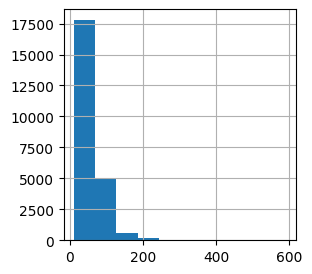

In [26]:
df['total_area'].hist(figsize=(3, 3))

<AxesSubplot: >

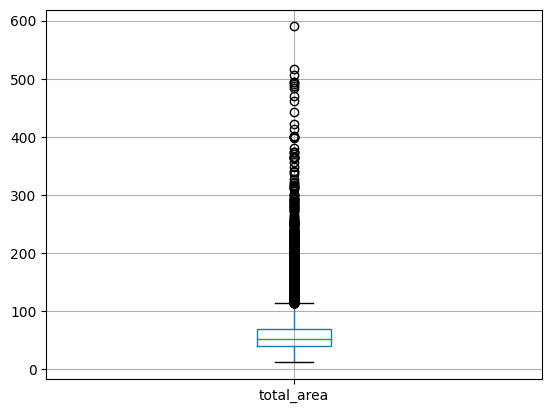

In [27]:
df.boxplot('total_area')

In [28]:
df['total_area'].max()

590.0

590 кв.метров – это конечно очень большая квартира, но в принципе, какой-нибудь пентхаус может занимать такую площадь. Не думаю, что здесь закралась ошибка

Далее рассмотрим  поле `'first_day_exposition'`:

In [29]:
print('MIN first_day_exposition:', df['first_day_exposition'].min())
print('MAX first_day_exposition:', df['first_day_exposition'].max())

MIN first_day_exposition: 2014-11-27 00:00:00
MAX first_day_exposition: 2019-05-03 00:00:00


<AxesSubplot: >

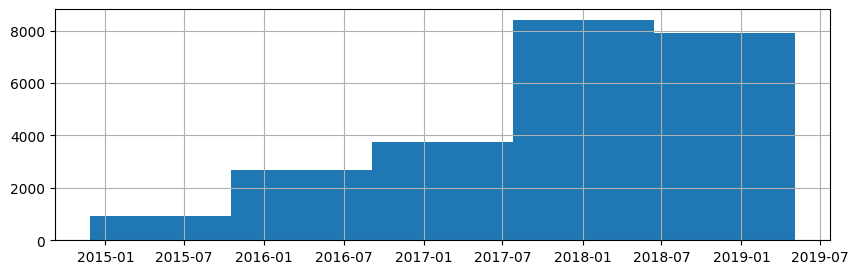

In [30]:
df['first_day_exposition'].hist(bins=5, figsize=(10, 3)) # 5 – это 5 лет

Видимо, данные накапливались постепенно. Выглядит адекватно, публикаций времён династии Романовых нет, объявлений из будущего тоже.

Далее рассмотрим поле `'rooms'`:

<AxesSubplot: >

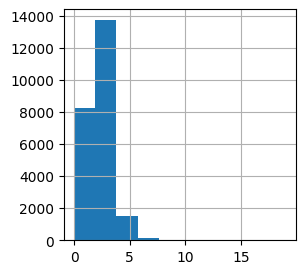

In [31]:
df['rooms'].hist(figsize=(3, 3))

In [32]:
df['rooms'].max()

19

19 комнат. Посмотрим на этот объек поближе:

In [33]:
df[df['rooms'] == df['rooms'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_it_piter,last_price_mlns
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,1,32.25


In [34]:
# рассчитаем среднюю площадь на одну комнату
df[df['rooms'] == df['rooms'].max()]['total_area'] / 19

14498    19.715789
Name: total_area, dtype: float64

19.7 кв.метров на комнату – это адекватно. Хотя объект, конечно, странный. Может в прошлом коммуналка. Пока оставим без изменений

Далее рассмотрим поле `'ceiling_height'`:

In [35]:
print('MIN ceiling_height:', df['ceiling_height'].min())
print('MAX ceiling_height:', df['ceiling_height'].max())

MIN ceiling_height: 1.0
MAX ceiling_height: 100.0


<AxesSubplot: >

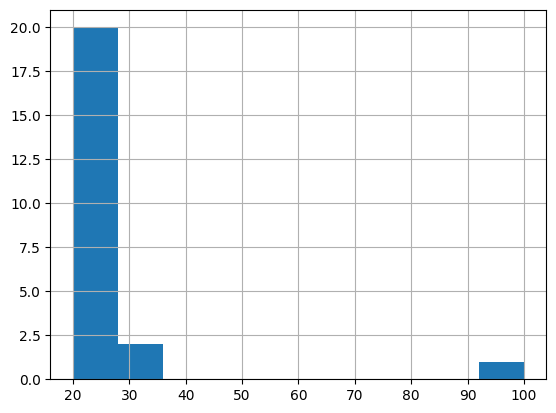

In [36]:
df['ceiling_height'].hist(range=(20, 100))

Значения больше 20 и до сорока, скорее всего, являются ошибкой, в которой при заполнении данных забыли поставить запятую, отделяющую целую и дробную часть исправить их можно, просто разделив на 10. Значение равное 100 – ошибка, но её причины неизвестны, по этому ....

In [37]:
df['ceiling_height'] = df['ceiling_height'].map(lambda x: x/10 if 20 <= x < 40 else x)

<AxesSubplot: >

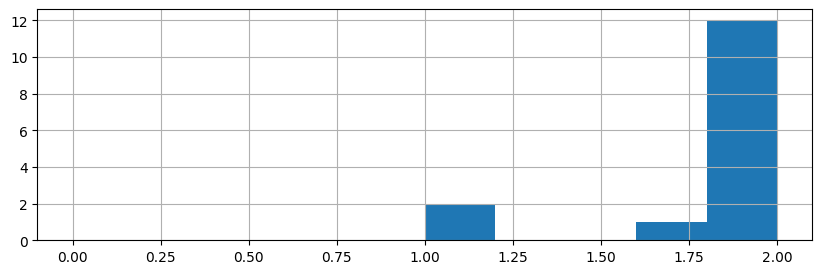

In [38]:
df['ceiling_height'].hist(range=(0, 2), figsize=(10, 3))

Далее рассмотрим поле `'floors_total'`:

In [39]:
print('MIN floors_total:', df['floors_total'].min())
print('MAX floors_total:', df['floors_total'].max())

MIN floors_total: 1.0
MAX floors_total: 60.0


<AxesSubplot: >

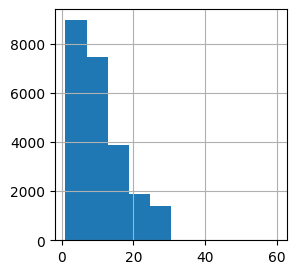

In [40]:
df['floors_total'].hist(figsize=(3, 3))

В целом, выглядит адекватно. 60й этаж – это конечно высоковато, но вполне может быть.

Далее рассмотрим поле `'living_area'`:

<AxesSubplot: >

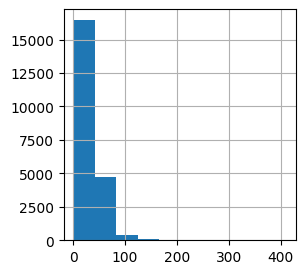

In [41]:
df['living_area'].hist(figsize=(3, 3))

На первый взгляд, всё выгялдит адекватно. <br>
Проверим есть ли объекты, у которых жилая площадь, превышает общую, чего быть не может

In [42]:
df[df['living_area'] > df['total_area']]['total_area'].count()

0

Таких объектов нет, что хорошо. Посмотрим на данные через boxplot

<AxesSubplot: >

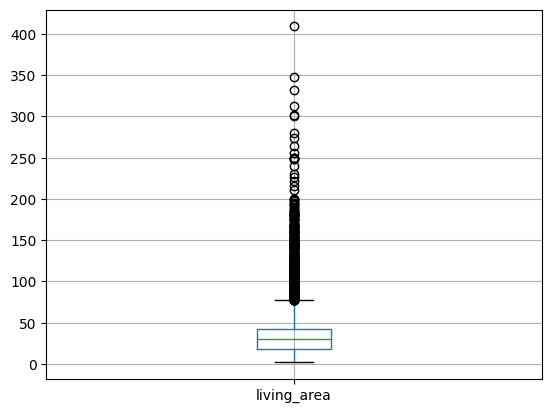

In [43]:
df.boxplot('living_area')

Имеются значение, превышающие Q3 + 1.5*IQR. Это могут быть как ошибки, так и реально большие объекты. Если это второй случай, то и цена у них будет должна быть пропорционально больше.<br>
Посмотрим на зависимость этих величин:

<AxesSubplot: xlabel='living_area', ylabel='last_price_mlns'>

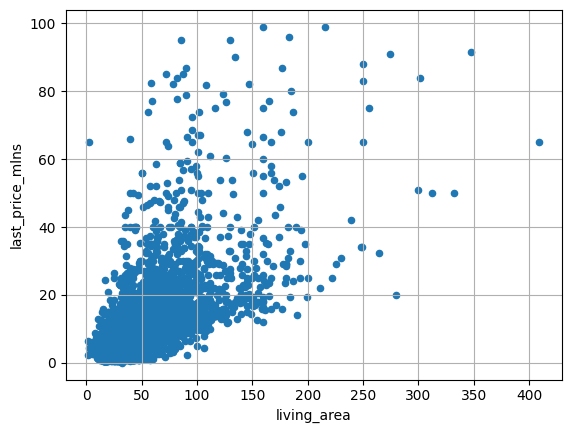

In [44]:
df.plot.scatter(x='living_area',
                  y='last_price_mlns',
                  grid=True
                  )

In [45]:
df.query("living_area > 250 and last_price < 30000000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_it_piter,last_price_mlns
20273,12,20000000.0,460.8,2019-03-20,6,3.1,3.0,279.6,1,NaN,...,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0,1,20.0


В целом, всё выглядит адекватно. Возможно в дальнейшем при расчёте средней арифмитической некоторые экстримальные значения надо будет исключить

Далее рассмотрим поле `'floor'` и `floors_total`:

In [46]:
print('Самый низкий этаж:', df['floor'].min()) # Не должно быть значений < 1 (хотя теоретически, могут быть цоколи)
print('Самыое маленькое здание:', df['floors_total'].min()) # Тут точно не должно быть значений < 1
print('Самое высокое здание:', df['floors_total'].max())
print('Самое выcоко расположенный объект:', df['floor'].max())

Самый низкий этаж: 1
Самыое маленькое здание: 1.0
Самое высокое здание: 60.0
Самое выcоко расположенный объект: 33


Отрицательных этажей нет и даже равных нулю – это хорошо. Шестидесяти этажное здание – высоковато, но адекватно.
Проверим, нет ли объектов, в которых квартира расположена выше крыши:

In [47]:
df[df['floor'] > df['floors_total']]['floor'].count()

0

Ошибок нет

Далее рассмотрим поле `'kitchen_area'`:

<AxesSubplot: >

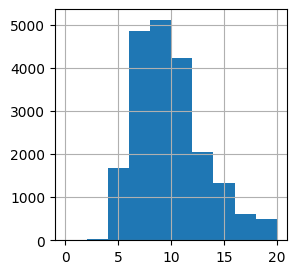

In [48]:
df['kitchen_area'].hist(range=(0, 20), figsize=(3, 3))

Кухня может быть даже очень большой, но она должна увеличиваться пропорционально общей площади квартиры.
Проверим это:

<AxesSubplot: xlabel='total_area', ylabel='kitchen_area'>

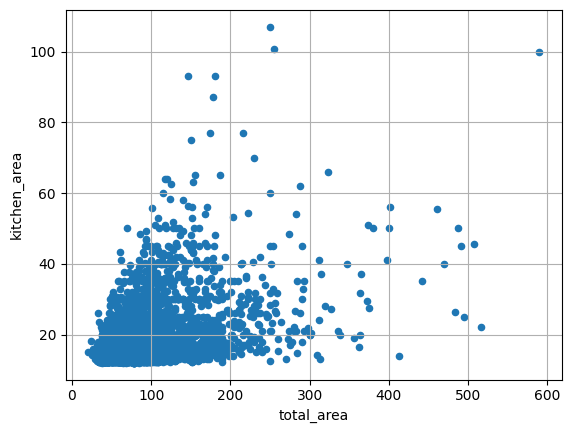

In [49]:
df[df['kitchen_area'] > 12].plot.scatter(x='total_area',
                y='kitchen_area',
                grid=True
                )

Из графика scatter plot вывод сделать сложно посмотрим на отношение площади кузни к площади всей квартиры

<AxesSubplot: >

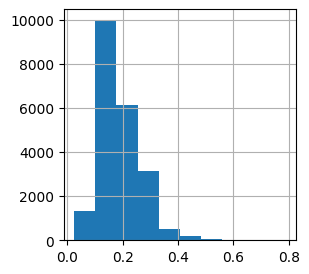

In [50]:
(df['kitchen_area'] / df['total_area']).hist(figsize=(3, 3))

In [51]:
df[(df['kitchen_area'] / df['total_area']) > 0.5]['kitchen_area'].count()

60

 Это странно, когда кухня занимает больше половины квартиры. Но в чем тут может быть ошибка, тоже не понятно. Ну по крайней мере, таких объектов не много.

Такие поля как:

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
1. Цена одного квадратного метра;

In [52]:
df['m2_price'] = df['last_price'] / df['total_area']

2. День недели публикации объявления;
3. Месяц публикации объявления;
4. Год публикации объявления;

In [53]:
df['weekday_of_publication'] =  df['first_day_exposition'].dt.weekday
df['month_of_publication']   =  df['first_day_exposition'].dt.month
df['year_of_publication']    =  df['first_day_exposition'].dt.year

5. тип этажа квартиры (значения — «первый», «последний», «другой»);

In [54]:
df['floor_type'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

7. Расстояние до центра города в километрах;

In [55]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['cityCenters_nearest_km'] = (round(df['cityCenters_nearest'] / 1000)).astype(int)

In [56]:
df[['cityCenters_nearest_km', 'cityCenters_nearest']].head(3)

,cityCenters_nearest_km,cityCenters_nearest
0,16,16028.0
1,19,18603.0
2,14,13933.0


### Проведём исследовательский анализ данных

#### Изучим следующие параметры объектов:
##### 1. Общая площадь

In [57]:
df['studio'] = df['studio'].astype(int)
df['open_plan'] = df['open_plan'].astype(int)

<AxesSubplot: >

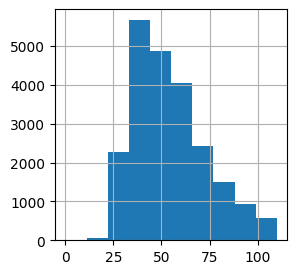

In [58]:
df['total_area'].hist(range=(0, 110), figsize=(3, 3))

In [59]:
print('Среднее {:>,.2f}'.format(df['total_area'].mean()))
print('Медиана {:>,.2f}'.format(df['total_area'].median()))

Среднее 59.93
Медиана 52.00


<AxesSubplot: xlabel='cityCenters_nearest', ylabel='total_area'>

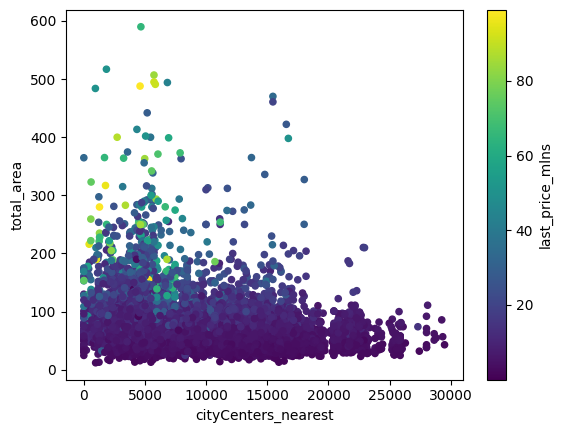

In [60]:
df[df['is_it_piter'] == 1].plot.scatter(
                                        x='cityCenters_nearest', 
                                        y='total_area', 
                                        c='last_price_mlns'
                                        )

График выглядит так, как-будто есть не большая отрицательная корреляция между удалённостью объекта от центра Питербурга и его площадью. <br>
Проверим это:

In [61]:
df['total_area'].corr(df['cityCenters_nearest'])

-0.07385689711736489

Действительно отрицательная, действительн не большая, можно сказать, в районе погрешности 

<AxesSubplot: xlabel='cityCenters_nearest', ylabel='total_area'>

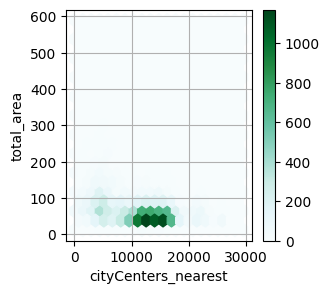

In [62]:
df[df['is_it_piter'] == 1].plot(x='cityCenters_nearest', y='total_area', kind='hexbin', 
                                gridsize=20, 
                                figsize=(3, 3),
                                 sharex=False, 
                                 grid=True
                                 )

Из данного графика можно сказать только, что большенство объектов находяться на расстоянии 10 - 20 км от центра Питера и их площадь редко превышает 70 кв.м.

<AxesSubplot: xlabel='is_it_piter'>

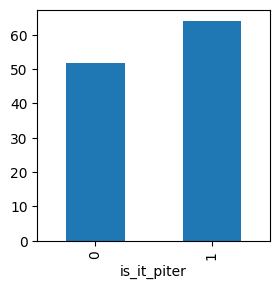

In [63]:
df.groupby('is_it_piter')['total_area'].mean().plot.bar(figsize=(3, 3))

Средняя площать объектов в Питере и в области отличаеться незначительно. И то это скорее всего из за того что в городе есть элитная недвижимость с большой площадью, которая смещает среднее арифметическое.<br>
Проверим это:

In [64]:
df.groupby('is_it_piter')['total_area'].median()


is_it_piter
0    47.0
1    55.0
Name: total_area, dtype: float64

Хоть медиана и больше, но она может быть смещена количество объектов, являющихся выбросами:

<AxesSubplot: title={'center': 'total_area'}, xlabel='is_it_piter'>

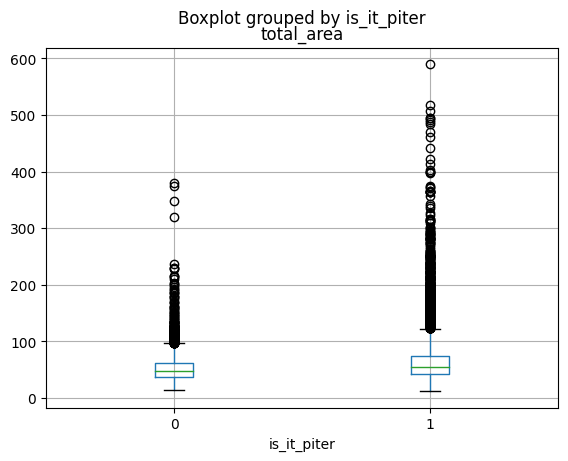

In [65]:
df.boxplot('total_area', 'is_it_piter')

Да, всё верно. Меры центральной тендеции, примерно равны. Но в питере больше выбросов.

##### 2. Жилая площадь

Скорее всего, жидая площадь будет вести себя так же, как и общая площадь, т.к. они должны быть пропроциональны. <br>
Проверим Это:

<AxesSubplot: xlabel='total_area', ylabel='living_area'>

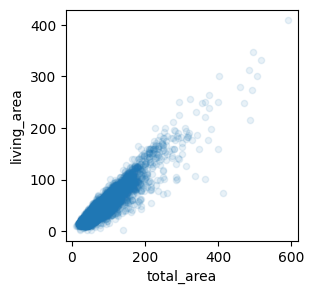

In [66]:
df.plot.scatter(x='total_area', y= 'living_area', alpha=0.1, figsize=(3, 3))

In [67]:
df['total_area'].corr(df['living_area'])

0.9381637070775479

Так и есть. Поведение данных, отражающих желую площадь будет такое же и у общей площади.<br>
Но, можно исследовать как будет вести себя доля жилой площади в общей площади объектов. <br>
Сделаем это:

In [68]:
df['living_area_rate'] = df['living_area'] / df['total_area']

<AxesSubplot: >

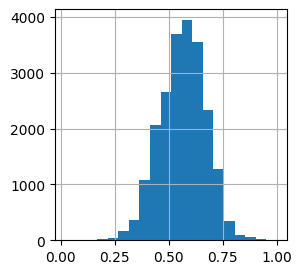

In [69]:
df['living_area_rate'].hist(bins=20, figsize=(3, 3))

Нормально распределение

In [70]:
print('Среднее {:>,.2f}'.format(df['living_area_rate'].mean()))
print('Медиана {:>,.2f}'.format(df['living_area_rate'].median()))

Среднее 0.56
Медиана 0.57


В среднем жилая площадь занимает чуть более половины площади квартиры

<AxesSubplot: title={'center': 'living_area_rate'}, xlabel='is_it_piter'>

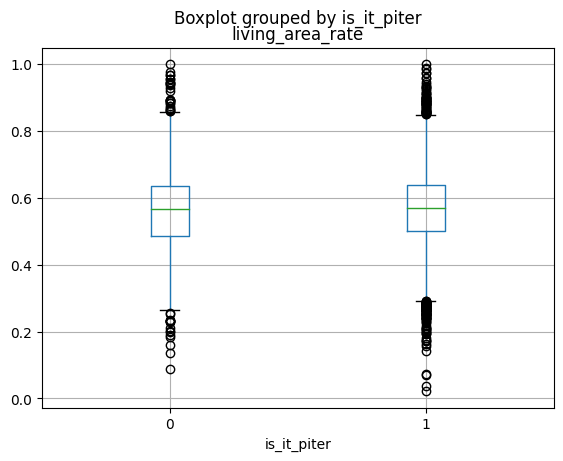

In [71]:
df.boxplot('living_area_rate', 'is_it_piter')

<AxesSubplot: title={'center': 'living_area_rate'}, xlabel='balcony'>

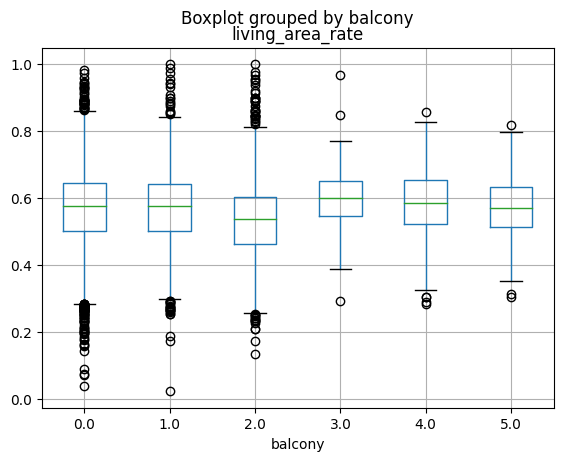

In [72]:
df.boxplot('living_area_rate', 'balcony')

<AxesSubplot: >

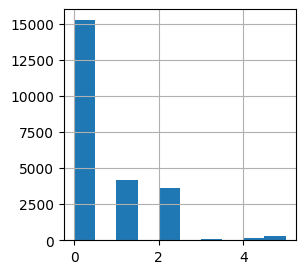

In [73]:
df['balcony'].hist(figsize=(3, 3))

Наличие балкона ничего не объесняет. Меньше обектов, меньше разброс.

<AxesSubplot: xlabel='last_price_mlns', ylabel='living_area_rate'>

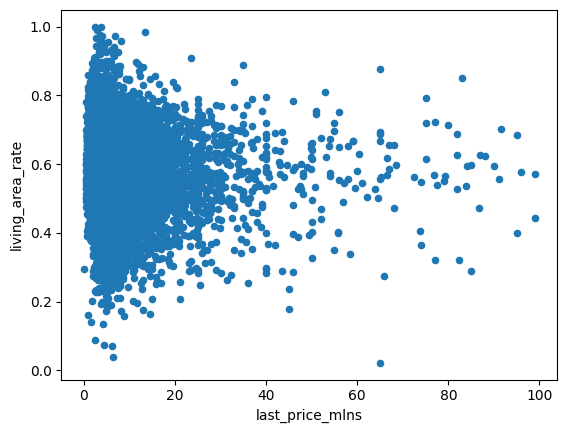

In [74]:
df.plot.scatter(x='last_price_mlns', y='living_area_rate')

In [75]:
df['last_price'].corr(df['living_area_rate'])

0.007387492733246535

<AxesSubplot: title={'center': 'living_area_rate'}, xlabel='studio'>

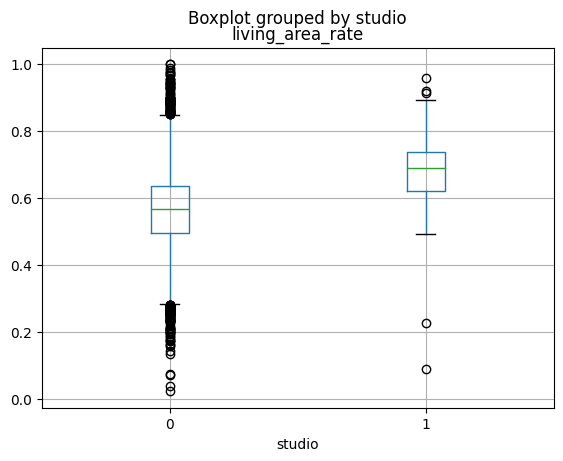

In [76]:
df.boxplot('living_area_rate', 'studio')

In [77]:
df[['studio']].mean()

studio    0.006297
dtype: float64

Студий в наших данных очень мало. Это объясняет предыдущий график – мало данных, меньше разброс

Каких-то значемых зависимостей между жилой площадью и общей от какого-либо фактора, не выявлено

##### 3. Площадь кухни

<AxesSubplot: >

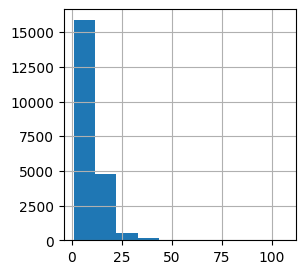

In [78]:
df['kitchen_area'].hist(figsize=(3, 3))

In [79]:
print('Среднее {:>,.2f}'.format(df['total_area'].mean()))
print('Медиана {:>,.2f}'.format(df['total_area'].median()))

Среднее 59.93
Медиана 52.00


<AxesSubplot: xlabel='total_area', ylabel='kitchen_area'>

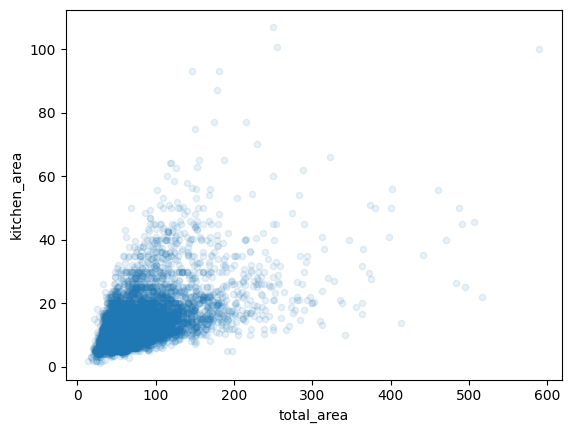

In [80]:
df.plot.scatter(x='total_area', y= 'kitchen_area', alpha=0.1)

In [81]:
df['total_area'].corr(df['kitchen_area'])

0.5935011897361961

Кореляция средняя

In [82]:
df['kitchen_area_rate'] = df['kitchen_area'] / df['total_area'] 

<AxesSubplot: >

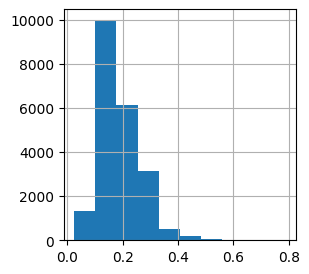

In [83]:
df['kitchen_area_rate'].hist(figsize=(3, 3))

<AxesSubplot: xlabel='last_price_mlns', ylabel='kitchen_area_rate'>

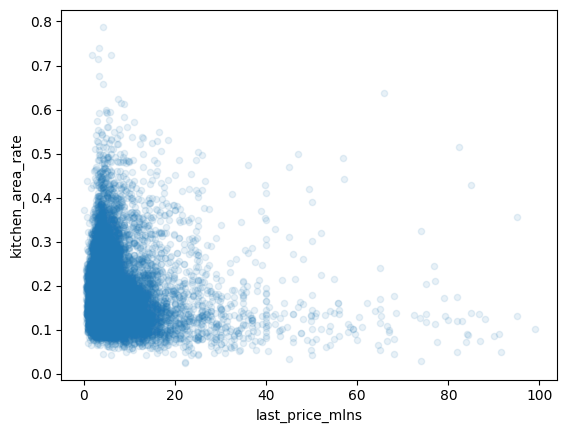

In [84]:
df.plot.scatter(x='last_price_mlns', y= 'kitchen_area_rate', alpha=0.1)

Доля площади занимаемой кухней резко сокращаеться. Скорее всего с ростом стоимости, растет количесвто жилих комнат.<br>
Проверим это рассмотрев тоже график , но заменив стоимость на количество комнат:

<AxesSubplot: xlabel='rooms', ylabel='kitchen_area_rate'>

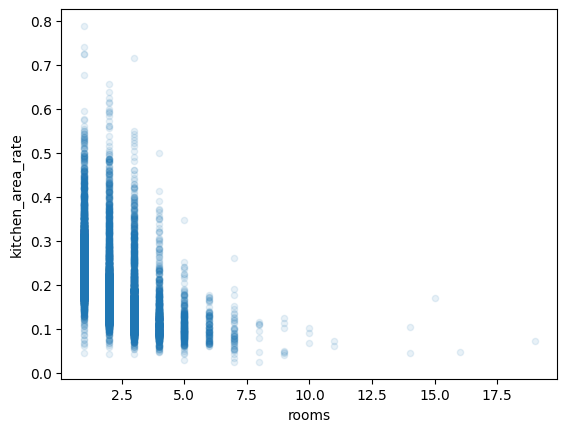

In [85]:
df.plot.scatter(x='rooms', y= 'kitchen_area_rate', alpha=0.1)

Так и есть.

<AxesSubplot: xlabel='last_price_mlns', ylabel='kitchen_area'>

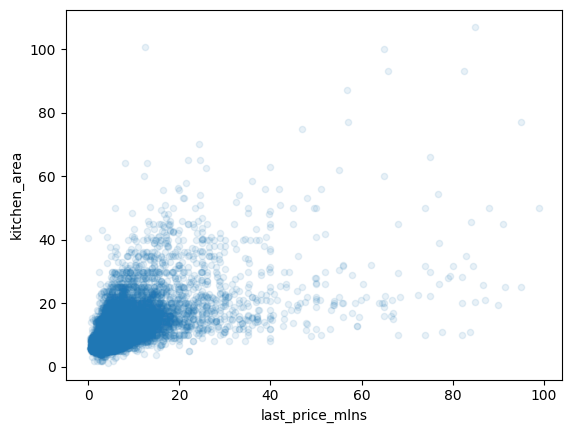

In [86]:
df.plot.scatter(x='last_price_mlns', y= 'kitchen_area', alpha=0.1)

<AxesSubplot: xlabel='last_price_mlns', ylabel='kitchen_area'>

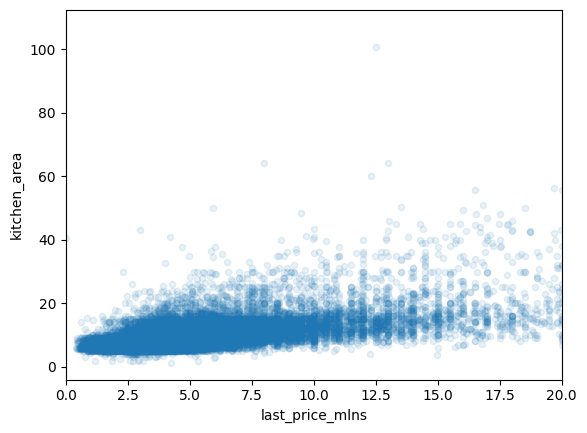

In [87]:
df.plot.scatter(x='last_price_mlns', y= 'kitchen_area', alpha=0.1, xlim=(0, 20))

Выглядит линейно. Посчитаем корреляцию

In [88]:
df[df['last_price_mlns'] < 20]['last_price'].corr(df[df['last_price_mlns'] < 20]['kitchen_area'])

0.5763405158055729

In [89]:
df[df['last_price_mlns'] >= 20]['last_price'].corr(df[df['last_price_mlns'] >= 20]['kitchen_area'])

0.253104992537827

При стоимости объекта до 20 млн. наблюдаеться средняя корреляци, после 20 млн очень слабая.<br>
Скорее всего, зависимость имеет место быть, но по достижению кухни определенного размера, дальнейшее её увеличение теряет смысл, даже при наличии денег

##### 4. Количество комнат

<AxesSubplot: >

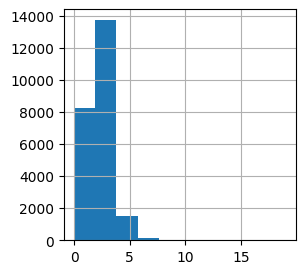

In [90]:
df['rooms'].hist(figsize=(3, 3))

In [91]:
print('Среднее {:>,.2f}'.format(df['rooms'].mean()))
print('Медиана {:>,.2f}'.format(df['rooms'].median()))

Среднее 2.07
Медиана 2.00


<AxesSubplot: >

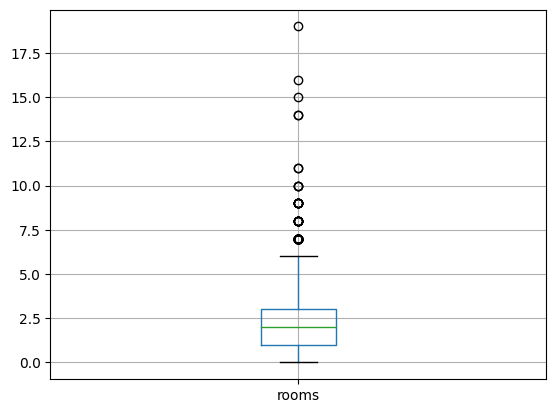

In [92]:
df.boxplot('rooms')

Выбросов мало, пропусков нет – красота

<AxesSubplot: title={'center': 'rooms'}, xlabel='is_it_piter'>

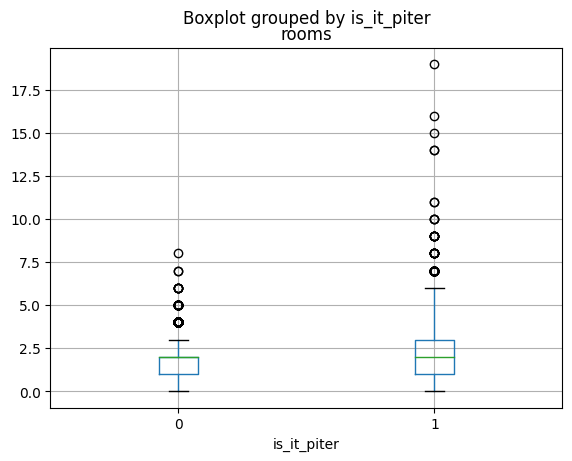

In [93]:
df.boxplot('rooms', 'is_it_piter')

В Питере в комнат в квартирах побольше

<AxesSubplot: xlabel='last_price_mlns', ylabel='rooms'>

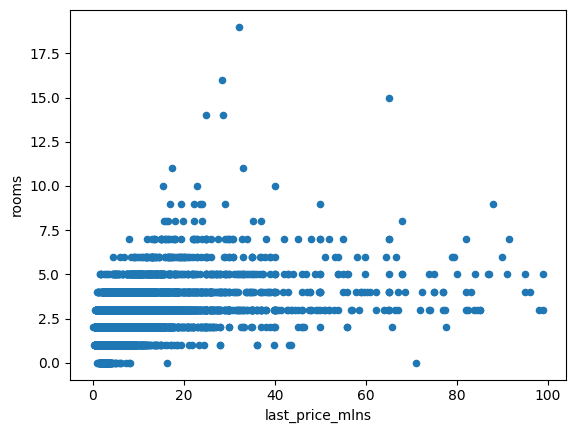

In [94]:
df.plot.scatter(x='last_price_mlns', y='rooms')

In [95]:
df[df['last_price_mlns'] >= 40]['last_price'].corr(df[df['last_price_mlns'] >= 40]['kitchen_area'])

0.19415018787141705

In [96]:
df[df['last_price_mlns'] < 40]['last_price'].corr(df[df['last_price_mlns'] < 40]['kitchen_area'])

0.6024335453148058

У объектов со стоимостью до 40 млн. наблюдаеться средняя кореляция между стоимостью объекта и количеством комнат. У объектов дороже эта корееляция слабая. <br>
Вывод: в сегменте элитной недвижимости, большое количество комнат не нужно.

In [97]:
df['avg_room_area'] = df['living_area'] / df['rooms']

<AxesSubplot: >

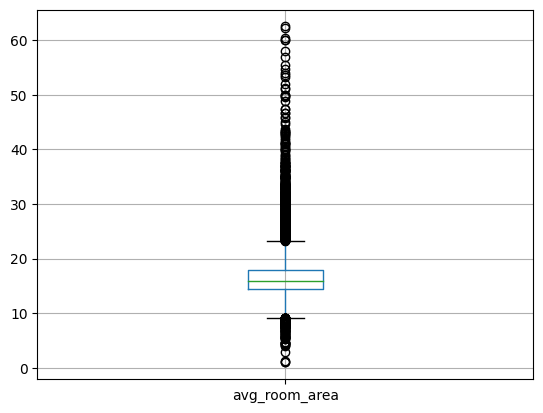

In [98]:
df.boxplot('avg_room_area')

<AxesSubplot: xlabel='last_price_mlns', ylabel='avg_room_area'>

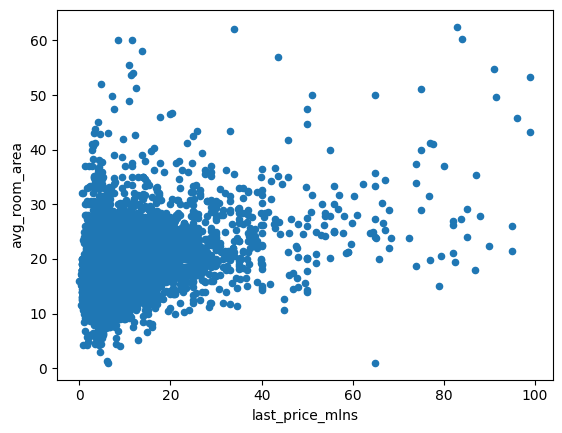

In [99]:
df.plot.scatter(x='last_price_mlns', y='avg_room_area')

Выглядит так, как будто между стоимостью объекта и срендей площадью комнаты есть прямая зависимость. По краней мере. с ростом стоимости повышаются минимальный значения среней площади.

In [100]:
df1 = df[(~df['avg_room_area'].isna()) & (~df['last_price'].isna())]

In [101]:
df.corr().head(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,is_it_piter,last_price_mlns,m2_price,weekday_of_publication,month_of_publication,year_of_publication,cityCenters_nearest_km,living_area_rate,kitchen_area_rate,avg_room_area
total_images,1.000000,0.131276,0.111293,0.095786,0.001232,0.011617,0.098610,0.031984,-0.029213,-0.024354,...,0.078459,0.131276,0.133169,-0.010448,0.005063,0.141306,0.003807,0.000608,-0.025125,0.037607
last_price,0.131276,1.000000,0.769103,0.472441,0.162704,0.006641,0.683361,0.036256,-0.039419,-0.012522,...,0.300536,1.000000,0.710463,-0.003121,0.007357,-0.053728,-0.055118,0.007387,-0.108494,0.407028


И хота рассчитанная корреляци 0.4, т.е. слабая, я всё же склоняюсь к выводу что она имеет место быть, т.е. минимальные значения срендней площади растут чуть ли не линейно. Просто имееться большая вариативнаясть в максимальных значениях. Т.е. в увеличение стоимости объекта, площадь комнат точно не будет ниже чем... и то "чем" увеличиваеться линейно

##### 5. Высота потолков

<AxesSubplot: >

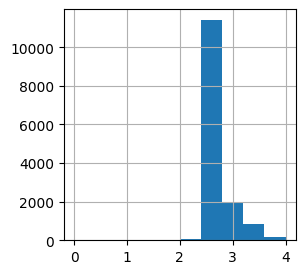

In [102]:
df['ceiling_height'].hist(range=(0, 4), figsize=(3, 3))

Т.к. высота потолка чаще всего соответсвует значениям, регламентируемым строительными нормами, разделим наши значение на группы, равные стандартным

<AxesSubplot: >

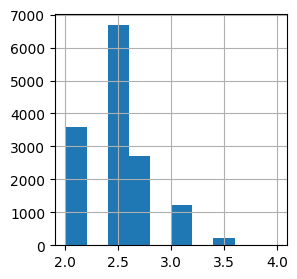

In [103]:
bins = [2, 2.5, 2.75, 3, 3.5, 4]
df['ceiling_height_rounded'] = pd.cut(df['ceiling_height'], bins=bins, labels=bins[:-1])
df['ceiling_height_rounded'].hist(range=(2, 4), figsize=(3, 3))

<AxesSubplot: xlabel='last_price_mlns', ylabel='ceiling_height_rounded'>

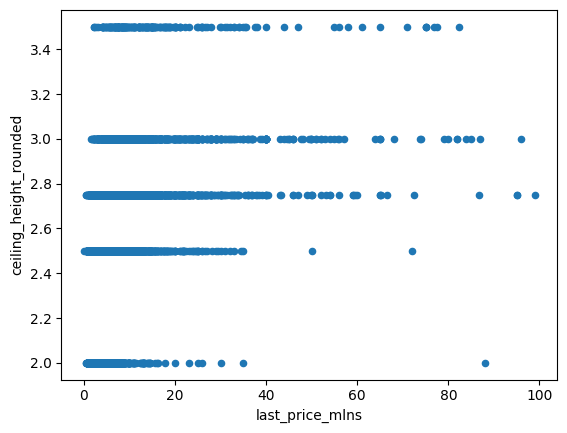

In [104]:
df.plot.scatter(x='last_price_mlns', y='ceiling_height_rounded' )

У "элитных" квартир (стоимостью где-то от 40 млн.) потолки ниже 2.75 практически не встречаются, а количество квартир с птолоками 2.75 снижаеться<br>
<b>Состоятельные люди, любят высокие потолки

##### 6. Этаж квартиры

<AxesSubplot: >

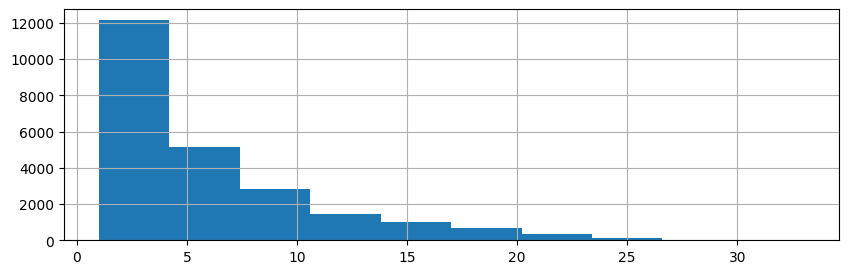

In [105]:
df['floor'].hist(figsize=(10, 3))

Большинство объектов находяться не выше пятого этажа. Это объясняеться большин количество пятиэтажных домов – если в доме больше пяти этажей, то на этажах с первого по пятый квартиры тоже будут. А вот если эиаже меньше 6, то выше пятого, квартир не будет.<br><br>
Такое колличества пятиэтажных домов объяняеться массовой застройко в период правхени Н.С. Хрущева (т.н. Хрущевки), да и сейчас пять этаже часто применяются при строительстве домов там, где не сильно дорогая земля. Это происходит потому, что по строительным нормам в домах от шести этажей и выше должен быть лифт, что приводит к сильному удоражанию строительства.

<AxesSubplot: >

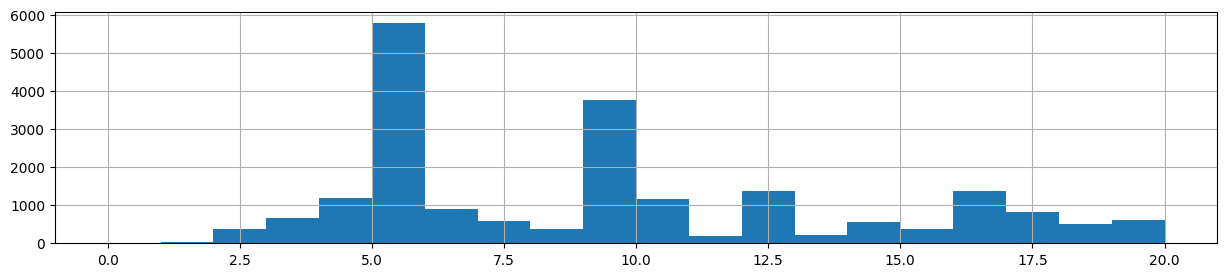

In [106]:
df['floors_total'].hist(bins=20, range=(0, 20), figsize=(15, 3))

Второй пик в 10 этаже объяняеться примерно так же; 10 этаже1 – это ещё один рубеж в рентабельности строительства, в домах этажностью выше десяти, должне дополнительно присутствовать грузовой лифт.

<AxesSubplot: >

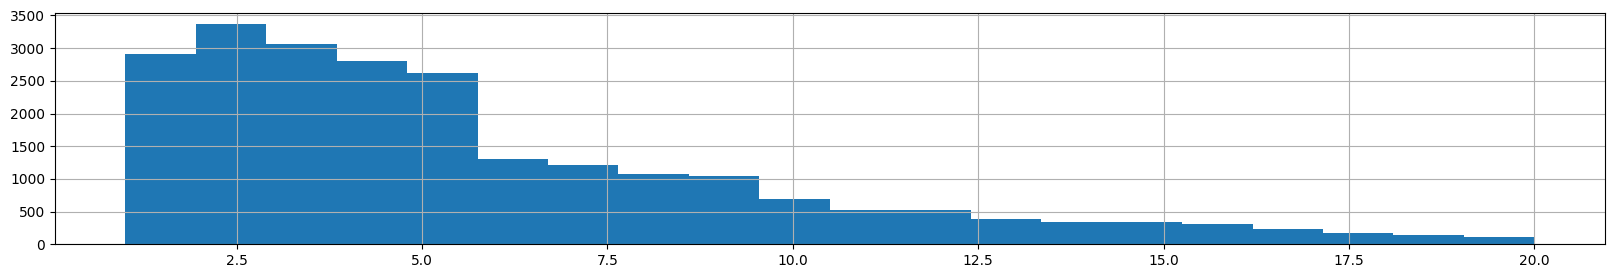

In [107]:
df['floor'].hist(bins=20, range=(1, 20), figsize=(20, 3))

<AxesSubplot: xlabel='last_price_mlns', ylabel='floor'>

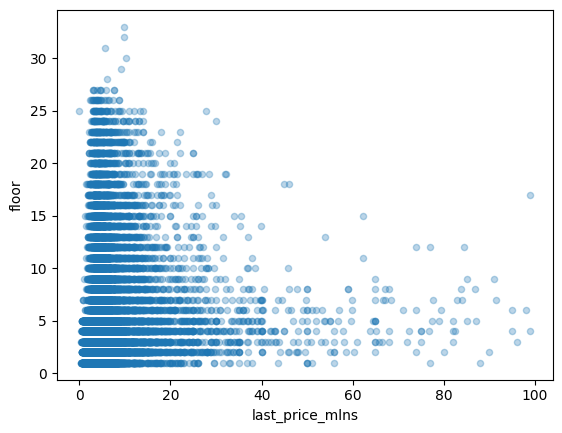

In [108]:
df.plot.scatter(x='last_price_mlns', y='floor', alpha=0.3)

In [109]:
df['floor'].corr(df['last_price'])

0.03625595409435011

И хотя корреляци очень низкая, из графика видно, что после 40 млн. за квартиру, высоко люди не селяться

Ещё я заметил, что 40 млн. какая-то сокральная цифра, на ней резко меняютьс характеристики объектов. Возможно, просто падает количесвто объектов.<br>
Рассмотрю эту величину подробнее при анализе стоимости объектов

##### 7. Общее количество этажей в доме

<AxesSubplot: xlabel='last_price_mlns', ylabel='floors_total'>

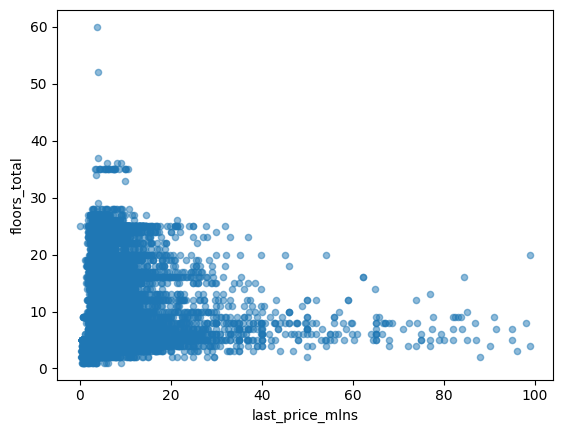

In [110]:
df.plot.scatter(x='last_price_mlns', y='floors_total', alpha=0.5)

In [111]:
df['last_price'].corr(df['floors_total'])

0.006640798453754882

<AxesSubplot: xlabel='last_price_mlns', ylabel='floors_total'>

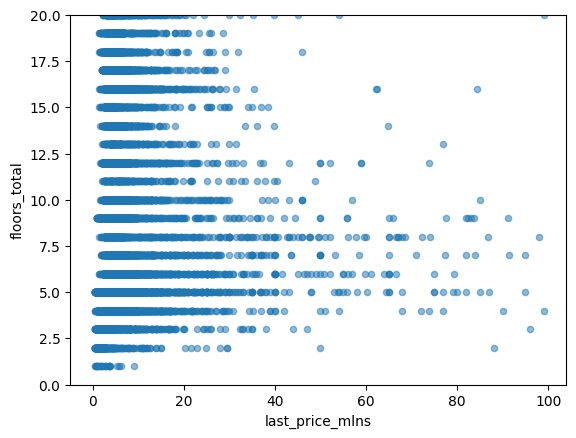

In [112]:
df.plot.scatter(x='last_price_mlns', y='floors_total', alpha=0.5, ylim=(0, 20))

Богачи не живут в домах ниже пятиэтажек и больше десяти. Если есть дньги – "человейник" не для тебя.<br> 
И снова, вывод справедлив для объектов со стоимостью от 40 млн.

##### 8. Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot: xlabel='floor_type'>

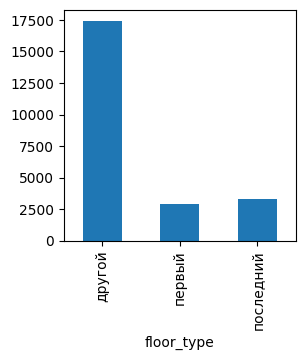

In [113]:
df.groupby('floor_type')['floor_type'].count().plot.bar(figsize=(3, 3))

<AxesSubplot: xlabel='floor_type'>

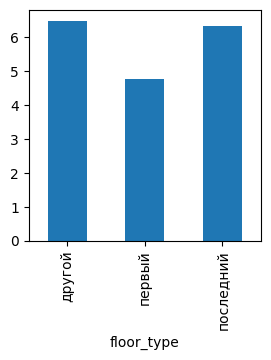

In [114]:
df.groupby('floor_type')['last_price_mlns'].mean().plot.bar(figsize=(3, 3))

In [115]:
avg_another_floor_cost = df[df['floor_type'] == 'другой']['last_price'].mean()
avg_last_floor_cost    = df[df['floor_type'] == 'последний']['last_price'].mean()
avg_first_floor_cost   = df[df['floor_type'] == 'первый']['last_price'].mean()

1 - (avg_first_floor_cost) / ((avg_another_floor_cost + avg_last_floor_cost)/2)

0.25444193496986867

Средняя стоимость квартир на последнем этаже не сильно отличаеться от квартир на всех других этажах, кроме первого.<br>
А вот стоимость первом этжа в среднем ниже на 25%

##### 9. Расстояние до центра города в метрах

Т.к я на знаю во всех ли городах расстояние от центра указанно именно до центра этих городов, а также для поселков и деревень эта метрика не показательна, рассмотрем её только в Питере

<AxesSubplot: >

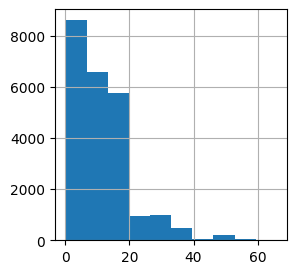

In [116]:
df['cityCenters_nearest_km'].hist(figsize=(3, 3))

<AxesSubplot: xlabel='cityCenters_nearest_km', ylabel='last_price_mlns'>

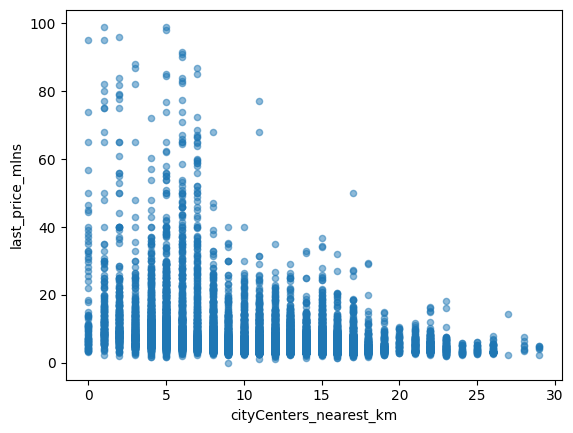

In [117]:
df[df['is_it_piter'] == 1].plot.scatter(x='cityCenters_nearest_km', y='last_price_mlns', alpha=0.5)

Дорогих квартир (стоимостью от 40 млн. – и снова эти 40 млн) дальше 15 км от центра практически нет. Они явно сосредоточены на расстоянии от 5 до 8 км.<br>
Что-то похожее на обратную кореляцию. Проверим это:

In [118]:
df['cityCenters_nearest'].corr(df['last_price'])

-0.05475863952467156

Действительно, обратная корреляция, но слабая. Попробуем исключить исторический центр в 5 км

In [119]:
df[df['cityCenters_nearest_km'] > 5]['cityCenters_nearest'].corr(df[df['cityCenters_nearest_km'] > 5]['last_price'])

-0.22095436801736354

Корреляция возросла более чем в 4 раза, но осталась на уровне "очень слабая". От себя добавлю "И все таки она есть"

10. Расстояние до ближайшего аэропорта

<AxesSubplot: >

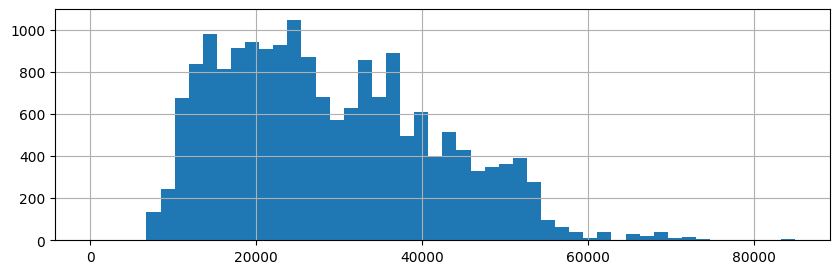

In [120]:
df['airports_nearest'].hist(figsize=(10, 3), bins=50)

<AxesSubplot: xlabel='airports_nearest', ylabel='last_price_mlns'>

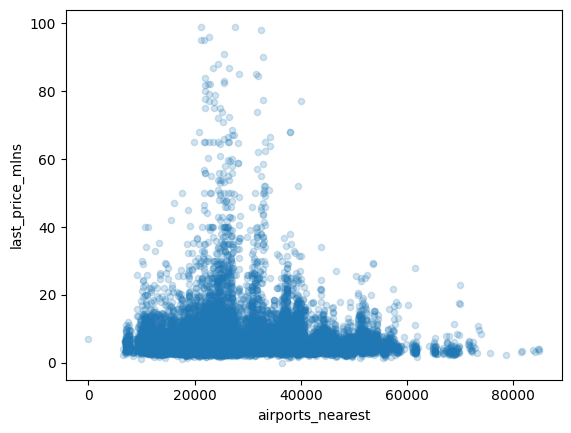

In [121]:
df.plot.scatter(x='airports_nearest', y='last_price_mlns', alpha=0.2)

Аэропорт Пулково находиться от центра Санкт-Петербурга на растоянии около 15 км. Скорее всего первый пик на графике, это, как раз, центр Петербурга<br>
Посмотрим как влияет расстояние до аэропорта на стоимость объектов за пределами Петербурга.

<AxesSubplot: xlabel='airports_nearest', ylabel='last_price_mlns'>

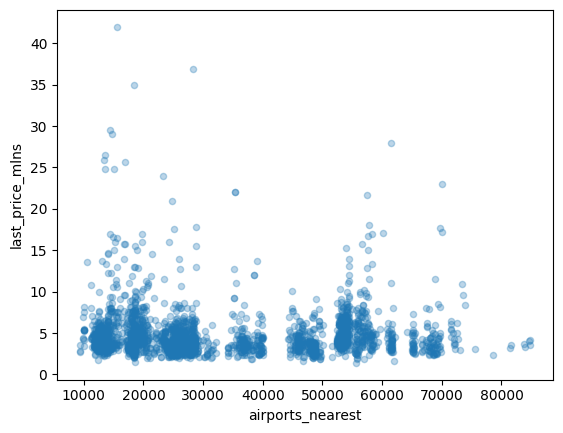

In [122]:
df[df['is_it_piter'] == 0].plot.scatter(
                                        x='airports_nearest', 
                                        y='last_price_mlns', 
                                        alpha=0.3
                                        )

Явной зависимости не наблюдаеться. Но видны кластерные скопления объектов,  видимо, это населенные пункты.

##### 11.  День и месяц публикации объявления

<AxesSubplot: >

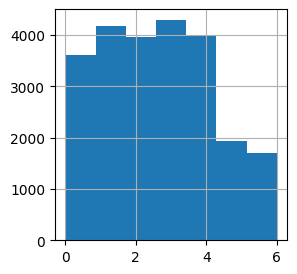

In [123]:
df['weekday_of_publication'].hist(bins=7, figsize=(3, 3))

В будни объявления публикую в два раза чаще чем в выходные. Рискну предположиьт, что это в основном делают реэлторы, т.к. это их работа, в будни они работают, а в выходные отдыхают

<AxesSubplot: >

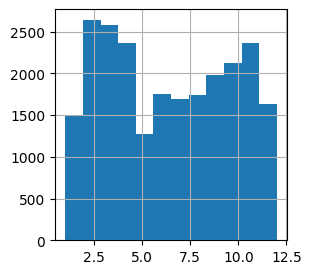

In [124]:
df['month_of_publication'].hist(bins=12, figsize=(3, 3))

Как и почти вовсех отраслях в нашей стране активность резко снижаеться в новогожние праздники и летом, точнее в мае, когда становится понастоящиму тепло.<br>
Пик активнсоти приходиться на февраль и ноябрь.

##### 12. Цена объекта

<AxesSubplot: >

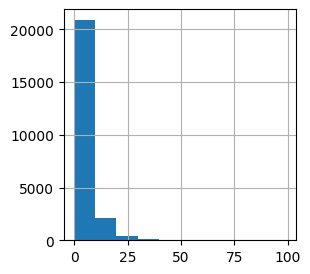

In [125]:
df['last_price_mlns'].hist(figsize=(3, 3))

<AxesSubplot: >

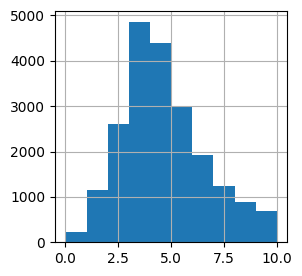

In [126]:
df['last_price_mlns'].hist(range=(0, 10), figsize=(3, 3))

<AxesSubplot: >

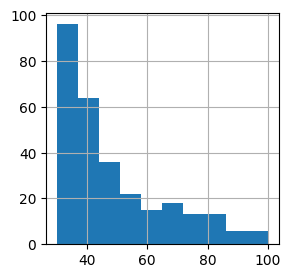

In [127]:
df['last_price_mlns'].hist(range=(30, 100), figsize=(3, 3))

In [128]:
print('Среднее {:>,.0f}'.format(df['last_price'].mean()))
print('Медиана {:>,.0f}'.format(df['last_price'].median()))


Среднее 6,251,508
Медиана 4,633,500


Т.к. стоимость объекта это главный параметр, который нас интересует, внимательно исследуем зависимости от основных характеристик.

<AxesSubplot: xlabel='last_price', ylabel='cityCenters_nearest_km'>

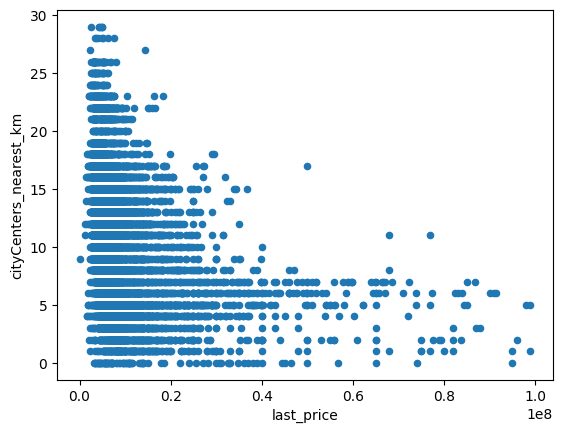

In [129]:
df[df['is_it_piter'] == 1].plot.scatter(x='last_price', y='cityCenters_nearest_km')

In [130]:
df[df['is_it_piter'] == 1]['last_price'].corr(df[df['is_it_piter'] == 1]['cityCenters_nearest'])

-0.3728673160552321

Слабая обратная корреляция. Что странно.

<AxesSubplot: xlabel='last_price', ylabel='total_area'>

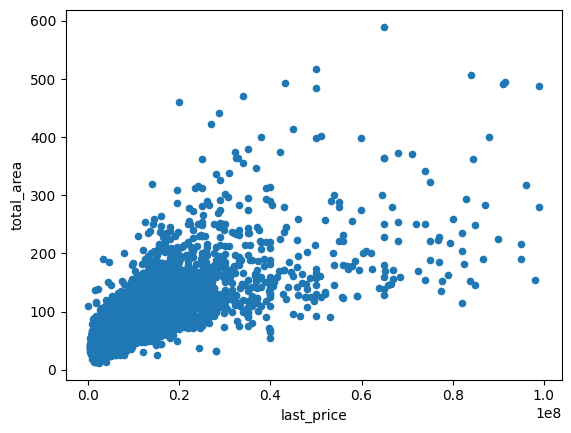

In [131]:
df.plot.scatter(x='last_price', y='total_area')

In [132]:
df['last_price'].corr(df['total_area'])

0.7691032119782025

Сильная прямая корреляция

<AxesSubplot: xlabel='last_price', ylabel='living_area'>

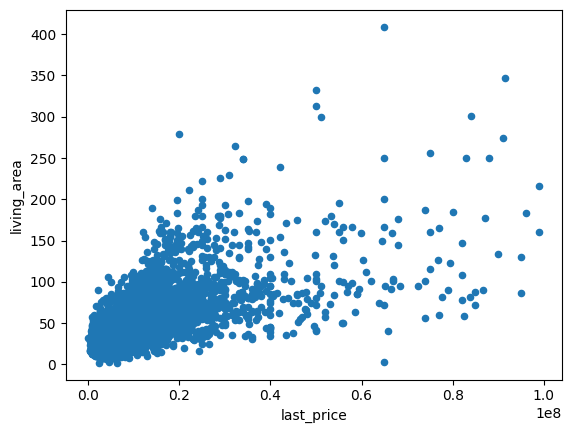

In [133]:
df.plot.scatter(x='last_price', y='living_area')

In [134]:
df['last_price'].corr(df['living_area'])

0.6833609151282997

<AxesSubplot: xlabel='last_price', ylabel='kitchen_area'>

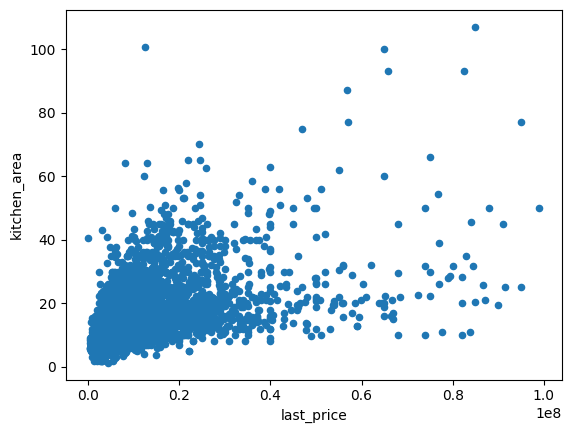

In [135]:
df.plot.scatter(x='last_price', y='kitchen_area')

In [136]:
df['last_price'].corr(df['kitchen_area'])

0.5922831065974375

<AxesSubplot: xlabel='last_price', ylabel='kitchen_area_rate'>

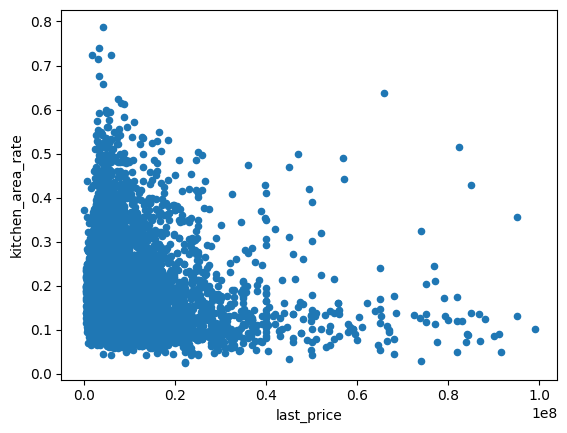

In [137]:
df.plot.scatter(x='last_price', y='kitchen_area_rate')

In [138]:
df['last_price'].corr(df['kitchen_area_rate'])

-0.1084938004541126

<AxesSubplot: xlabel='last_price', ylabel='days_exposition'>

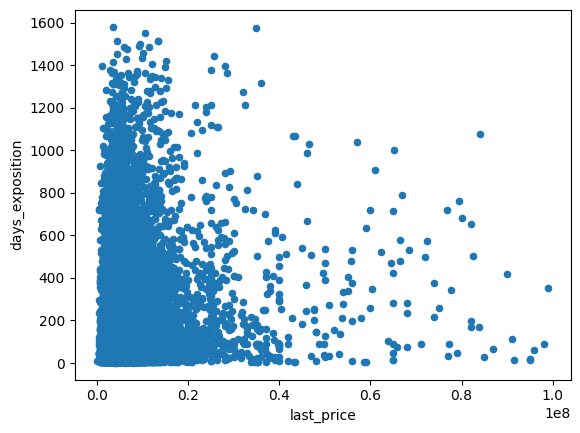

In [139]:
df.plot.scatter(x='last_price', y='days_exposition')

In [140]:
df['last_price'].corr(df['days_exposition'])

0.12316202755302044

<AxesSubplot: xlabel='last_price', ylabel='parks_nearest'>

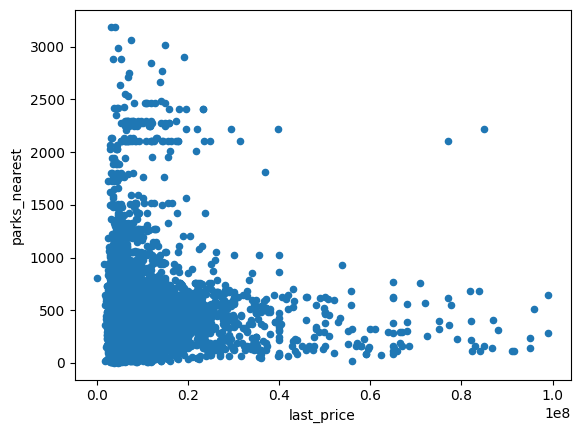

In [141]:
df.plot.scatter(x='last_price', y='parks_nearest')

In [142]:
df['last_price'].corr(df['parks_nearest'])

-0.016081732233180015

<AxesSubplot: xlabel='weekday_of_publication', ylabel='last_price'>

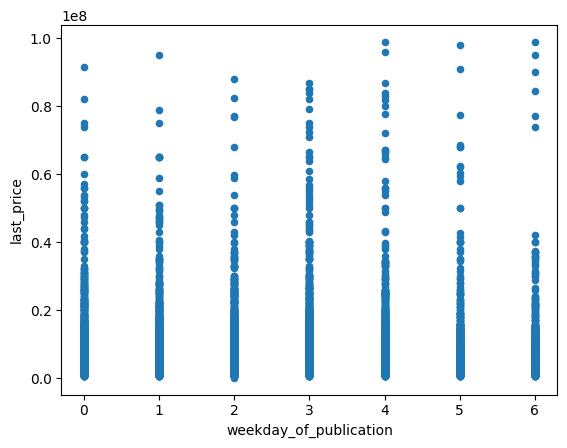

In [143]:
df.plot.scatter(x='weekday_of_publication', y='last_price')

<AxesSubplot: xlabel='weekday_of_publication'>

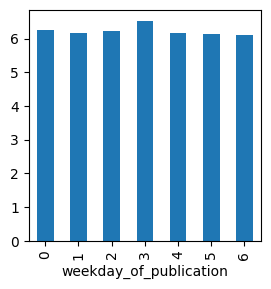

In [144]:
df.groupby('weekday_of_publication')['last_price_mlns'].mean().plot.bar(figsize=(3, 3))

In [145]:
df['last_price'].corr(df['weekday_of_publication'])

-0.003120516545319871

Немного выделяесться среда. Но обяснить это особо нечем. Корреляции, по сути, нет

<AxesSubplot: xlabel='month_of_publication', ylabel='last_price'>

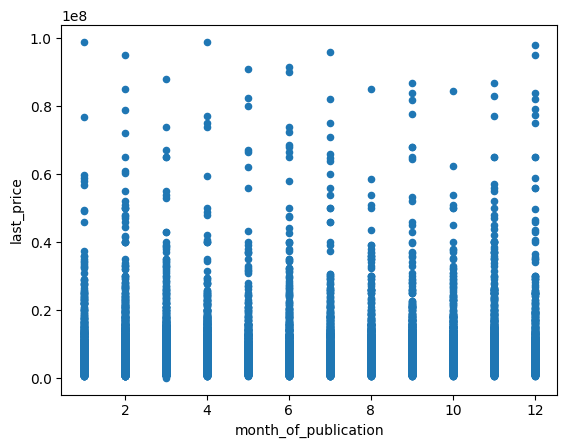

In [146]:
df.plot.scatter(x='month_of_publication', y='last_price')

<AxesSubplot: xlabel='month_of_publication'>

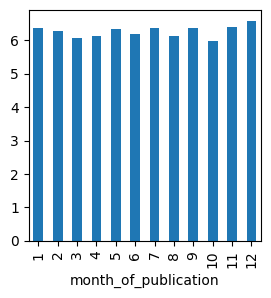

In [147]:
df.groupby('month_of_publication')['last_price_mlns'].mean().plot.bar(figsize=(3, 3))

In [148]:
df['last_price'].corr(df['month_of_publication'])

0.007357145375885136

<AxesSubplot: xlabel='year_of_publication', ylabel='last_price_mlns'>

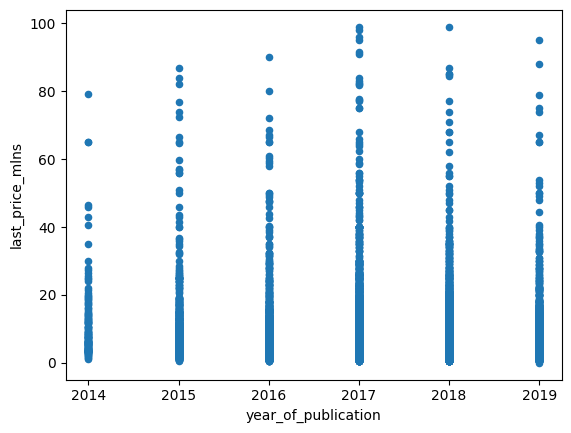

In [149]:
df.plot.scatter(x='year_of_publication', y='last_price_mlns')

Максимальные значения росли до 2017 года, потом снижались

<AxesSubplot: xlabel='year_of_publication'>

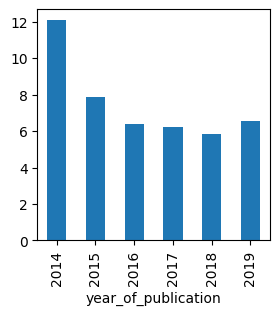

In [150]:
df.groupby('year_of_publication')['last_price_mlns'].mean().plot.bar(figsize=(3, 3))

Средние значения наоборот, снижались вплоть до 2018 года.

In [151]:
df['last_price'].corr(df['year_of_publication'])

-0.053728399430070656

#### Изучим, как быстро продавались квартиры:

<AxesSubplot: >

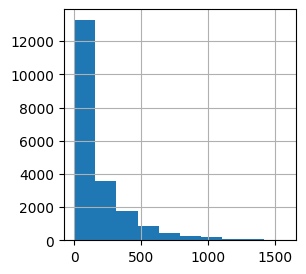

In [152]:
df['days_exposition'].hist(figsize=(3, 3))

<AxesSubplot: >

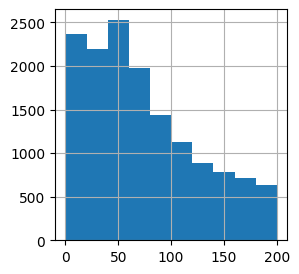

In [153]:
df['days_exposition'].hist(range=(0, 200), figsize=(3, 3))

In [154]:
print('Среднее', df['days_exposition'].mean())
print('Медиана', df['days_exposition'].median())

Среднее 180.64151127599337
Медиана 95.0


<AxesSubplot: >

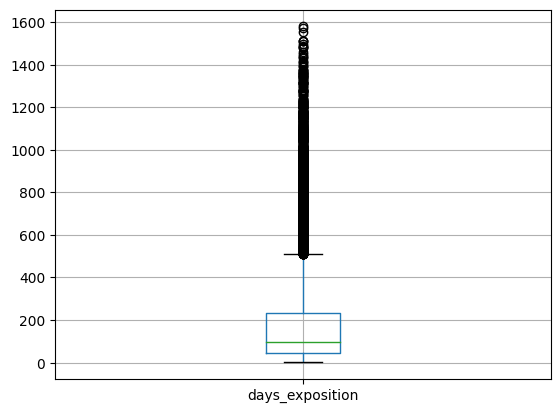

In [155]:
df.boxplot('days_exposition')

In [156]:
df['days_exposition'].describe()

count    20486.000000
mean       180.641511
std        219.557320
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В основном продажа квартиры занимает от трех (медиана) месяцев до полугода (среднее арифмитическое). Самое часто встречаемое значение (мода) находится в районе двух месяцев, т.к. она существенно ниже и среднеарифметического и медианы, думаю продажт от двух месяцев и ниже можно считать быстрыми. Долгими можно считать продажи длиннее 500 дней

#### Пармаетры больше всего влияющие на стоимость объекта

Т.к. при изучении большинства пераметров мы проверяли насколько они влияют на цену объекта, то здесь, просто, подыдожем выявленные зависимости:
<
1. Площадь. Коээфицены кореляции: Общая (0,77), Жилая (0,68), Кухня (0,59)
2. Тип этажа квартиры. Средняя стоимость квартир на последнем этаже не сильно отличаеться от квартир на всех других этажах, кроме первого.<
А вот стоимость первом этаже в среднем ниже на 25%.
3. Расстояние до центра города. Корреляция слабая обратная: общая -0,22, в питере -0,37

>

#### Расчитаем среднюю цену одного квадратного метра в населённых пунктах.

Cреднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [157]:
df.pivot_table(
                index='locality_name', 
                values='last_price_mlns', 
                aggfunc=['count', 'mean'], 
                margins_name=['locality_name', 'count', 'mean']).sort_values(('count', 'last_price_mlns'), ascending=False).head(10)

,count,mean
,last_price_mlns,last_price_mlns
locality_name,,
Санкт-Петербург,15684,7.628518
пок Мурино,556,3.652361
пок Шушары,440,4.108082
Всеволожск,398,3.789068
Пушкин,369,6.469036
Колпино,338,3.964021
пок Парголово,327,4.488075
Гатчина,307,3.488337


 Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:


In [158]:
print('Населенный пункт с объектом с самым дороги кв.м.:', list(df[df['m2_price'] == df['m2_price'].max()]['locality_name'].drop_duplicates())[0])
print('Населенный пункт с объектом с самым дешёвым кв.м.:', list(df[df['m2_price'] == df['m2_price'].min()]['locality_name'].drop_duplicates())[0])

Населенный пункт с объектом с самым дороги кв.м.: Санкт-Петербург
Населенный пункт с объектом с самым дешёвым кв.м.: Санкт-Петербург


In [159]:
print('Населенный пункт с самым дороги средним кв.м.:',df.groupby('locality_name', as_index=False)['m2_price'].mean().max()['locality_name'])
print('Населенный пункт с самым дешевым средним кв.м.:',df.groupby('locality_name', as_index=False)['m2_price'].mean().min()['locality_name'])

Населенный пункт с самым дороги средним кв.м.: садовое товарищество Садко
Населенный пункт с самым дешевым средним кв.м.:  Агалатово


#### Вычислим среднюю цену каждого километра от центра для Санкт-Петербург

<AxesSubplot: xlabel='cityCenters_nearest_km'>

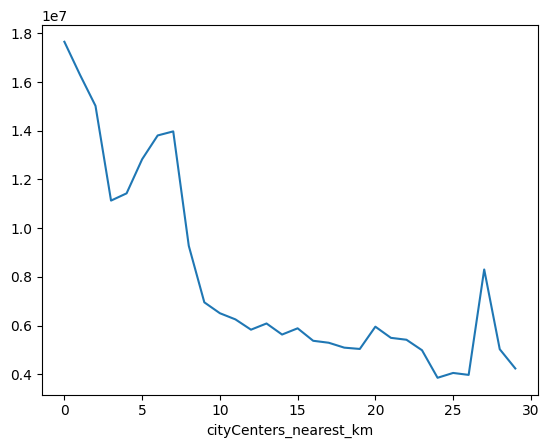

In [160]:
df[df['is_it_piter'] == 1].groupby('cityCenters_nearest_km')['last_price'].mean().plot.line()

Стоимость квартир в Петербурге уменьшаеться по мере по мере удаления от центра.<br>
Выделяются два пика:
<
1. 5-7 км. Скорее всего в пределах пяти км. расположен исторический центр со старым желым фондом
2. Примерно в районе 27 км. Скорее всего, какой-то элитный район
>

### Общий вывод

В ходе работы были изучены данные данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Были выявленные и описаны выше основные факторы, влияющие на стоимость объектов недвижимости, а также следующие закономерности:
<ul>
    <li>Площадь кухни имеет среднюю корреляцию с общей площадью. Доля площади занимаемой кухней резко сокращается c ростом стоимости, растет количество жилых.
    <li>При стоимости объекта до 20 млн. наблюдается средняя корреляции, после 20 млн очень слабая.<br>. Скорее всего, зависимость имеет место быть, но по достижению кухни определенного размера, дальнейшее её увеличение теряет смысл, даже при наличии денег
    <li>У объектов со стоимостью до 40 млн. наблюдается средняя корреляция между стоимостью объекта и количеством комнат. У объектов дороже эта корреляция слабая. <br>
    Вывод: в сегменте элитной недвижимости, большое количество комнат не нужно.
    <li>Возможно между стоимостью объекта и средней площадью комнаты есть прямая зависимость. По крайней мере, с ростом стоимости повышаются минимальный значения средней площади.<br>Хота, рассчитанная корреляции 0.4, т.е. слабая, я всё же склоняюсь к выводу что она имеет место быть, т.е. минимальные значения средней площади растут чуть ли не линейно. Просто имеется большая вариативность в максимальных значениях. Т.е. в увеличение стоимости объекта, площадь комнат точно не будет ниже чем... и то "чем" увеличивается линейно.
    <li>У "элитных" квартир (стоимостью где-то от 40 млн.) потолки ниже 2.75 практически не встречаются, а количество квартир с потолками 2.75 снижается<br>Состоятельные люди, любят высокие потолки.
    <li>При анализе этаже, на которых расположены квартиры, обнаружены выраженных рубежа в 5 этаже и 10 этажей это связанно с количество домов соответствующей этажности. Т.к. данные рубежи определяю необходимость установки лифтов, что влияет на рентабельность строительства.
    <li>Объекты стоимостью от 40 мл.н домах ниже пятиэтажек и больше десяти.
    <li>Многие характеристика объектов меняют свое поведение при стоимости от 40 млн. При этом, какого-то явного рубежа в количестве объектов, на этой отметке не наблюдается. Причина такой аномалии не понятна и требует более детального анализа.
    <li>При стоимости объекта до 20 млн. наблюдается средняя корреляция между стоимостью объекта и площадью кухни, после 20 млн очень слабая.<br>Скорее всего, зависимость имеет место быть, но по достижению кухни определенного размера, дальнейшее её увеличение теряет смысл, даже при наличии денег.
    <li>В Питере в среднем комнат в квартирах побольше.
    <li>У объектов со стоимостью до 40 млн. наблюдается средняя корреляция между стоимостью объекта и количеством комнат. У объектов дороже эта корреляция слабая. <br>Вывод: в сегменте элитной недвижимости, большое количество комнат не нужно.
    <li>Возможно, как будто между стоимостью объекта и средней площадью комнаты есть прямая зависимость. По крайней мере. с ростом стоимости повышаются минимальный значения средней площади.
    <li>Дорогих квартир (стоимостью от 40 млн. – и снова эти 40 млн) дальше 15 км от центра практически нет. Они явно сосредоточены на расстоянии от 5 до 8 км. 
</ul>


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод